<a href="https://colab.research.google.com/github/inggridpris/Customer-s-Online-Loan/blob/main/Customer's%20Online%20Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Seaborn Version:', sns.__version__)

Numpy Version: 1.21.6
Pandas Version: 1.3.5
Seaborn Version: 0.11.2


In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df1= pd.read_csv('/content/drive/My Drive/Home Credit Indonesia/application_train.csv')

In [ ]:
df1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df6=df1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                   'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                   'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                   'NAME_HOUSING_TYPE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
                   'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                   'OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                   'WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                   'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
                   'ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
df2= pd.read_csv('/content/drive/My Drive/Home Credit Indonesia/previous_application.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
df5=df2[['SK_ID_PREV','SK_ID_CURR','AMT_APPLICATION','AMT_DOWN_PAYMENT','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED',
         'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON',
         'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE',
         'SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','CNT_PAYMENT','NAME_YIELD_GROUP','PRODUCT_COMBINATION','DAYS_FIRST_DRAWING',
         'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']]

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 30 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   AMT_APPLICATION              1670214 non-null  float64
 3   AMT_DOWN_PAYMENT             774370 non-null   float64
 4   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 5   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 6   RATE_DOWN_PAYMENT            774370 non-null   float64
 7   RATE_INTEREST_PRIMARY        5951 non-null     float64
 8   RATE_INTEREST_PRIVILEGED     5951 non-null     float64
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [ ]:
df1 = pd.read_csv('application_train.csv')

FileNotFoundError: ignored

In [ ]:
df2 = pd.read_csv('previous_application.csv')

FileNotFoundError: ignored

In [ ]:
df=df6.merge(df5, on='SK_ID_CURR', how='inner')

In [ ]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 73 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT                   1413701 non-null  float64
 9   AMT_ANNUITY                  1413608 non-null  float64
 10  AMT_GOODS_PRICE              1412493 non-null  float64
 11  NAME_TYPE_SUITE              1410175 non-null  object 
 12  NAME_INCOME_TYPE             1413701 non-n

In [ ]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
61568,115660,0,Cash loans,F,N,Y,1,207000.0,973710.0,34627.5,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1027544,359292,0,Cash loans,F,N,N,0,121500.0,900000.0,60520.5,...,Connectivity,12.0,high,POS mobile with interest,365243.0,-2144.0,-1814.0,-1814.0,-1808.0,0.0
514555,230253,0,Cash loans,F,N,Y,0,112500.0,807984.0,26833.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,-87.0,0.0
1122761,382495,0,Cash loans,F,N,Y,0,121500.0,477000.0,21141.0,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-1940.0,-1670.0,-1670.0,-1342.0,0.0
515398,230496,0,Cash loans,F,N,N,0,135000.0,157914.0,15745.5,...,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-785.0,-95.0,-155.0,-149.0,0.0


## Exploratory Data Analysis

### Statistical Descriptive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 73 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT                   1413701 non-null  float64
 9   AMT_ANNUITY                  1413608 non-null  float64
 10  AMT_GOODS_PRICE              1412493 non-null  float64
 11  NAME_TYPE_SUITE              1410175 non-null  object 
 12  NAME_INCOME_TYPE             1413701 non-n

In [ ]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
184258,146507,1,Cash loans,F,N,Y,0,247500.0,1293165.0,37939.5,...,XNA,24.0,high,Cash X-Sell: high,365243.0,-725.0,-35.0,-485.0,-476.0,1.0
1025278,358754,0,Cash loans,F,N,Y,0,135000.0,157500.0,7704.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
38623,109747,0,Cash loans,M,Y,Y,1,585000.0,1546020.0,42642.0,...,Connectivity,8.0,high,POS mobile with interest,365243.0,-1442.0,-1232.0,-1292.0,-1287.0,0.0
948346,339720,0,Cash loans,F,N,Y,0,117000.0,103500.0,12411.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1168681,393431,0,Cash loans,F,N,Y,0,337500.0,436032.0,16434.0,...,XNA,60.0,low_normal,Cash X-Sell: low,365243.0,-830.0,940.0,365243.0,365243.0,1.0


In [ ]:
df['TARGET'] = df['TARGET'].replace({0:False, 1:True})
df['FLAG_EMP_PHONE'] = df['FLAG_EMP_PHONE'].replace({0:False, 1:True})
df['FLAG_PHONE'] = df['FLAG_PHONE'].replace({0:False, 1:True})
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].replace({0:False, 1:True})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 73 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  bool   
 2   NAME_CONTRACT_TYPE           1413701 non-null  object 
 3   CODE_GENDER                  1413701 non-null  object 
 4   FLAG_OWN_CAR                 1413701 non-null  object 
 5   FLAG_OWN_REALTY              1413701 non-null  object 
 6   CNT_CHILDREN                 1413701 non-null  int64  
 7   AMT_INCOME_TOTAL             1413701 non-null  float64
 8   AMT_CREDIT                   1413701 non-null  float64
 9   AMT_ANNUITY                  1413608 non-null  float64
 10  AMT_GOODS_PRICE              1412493 non-null  float64
 11  NAME_TYPE_SUITE              1410175 non-null  object 
 12  NAME_INCOME_TYPE             1413701 non-n

Hasil Pengamatan:
1. Teridiri dari 72 kolom
2. memiliki 1413701 baris
3. Memiliki tipe data float, integer, dan object
4.Beberapa kolom memiliki data kosong
5. Pada kolom Target, tipe datanya diubah dari int menjadi bool. 0: False dan 1: True
6. Pada kolom Flag EMP Phone,tipe datanya diubah dari int menjadi bool. 0: False dan 1: True
7. Pada kolom Flag Phone,tipe datanya diubah dari int menjadi bool. 0: False dan 1: True
8. Pada kolom Flag Email,tipe datanya diubah dari int menjadi bool. 0: False dan 1: True

### Cuplikan Data

In [ ]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
368142,193059,False,Cash loans,F,N,N,0,202500.0,780363.0,33192.0,...,Connectivity,NaN,XNA,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
534658,235295,False,Cash loans,F,N,Y,0,135000.0,152820.0,12073.5,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
744699,288606,False,Cash loans,F,Y,Y,0,225000.0,497520.0,49207.5,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-951.0,-681.0,-681.0,-673.0,0.0
145393,136747,False,Cash loans,M,Y,Y,0,180000.0,675000.0,21906.0,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
426971,208017,False,Cash loans,F,N,N,0,135000.0,450000.0,22018.5,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-1299.0,-1149.0,-1149.0,-1146.0,0.0


### Statistical Summary

In [ ]:
nums = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_FAM_MEMBERS','CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN']
cats = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_HOUSING_TYPE','CODE_REJECT_REASON','FLAG_PHONE','FLAG_EMAIL','FLAG_EMP_PHONE']

In [ ]:
df[nums].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_FAM_MEMBERS,CNT_PAYMENT,DAYS_FIRST_DUE,DAYS_LAST_DUE,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_CHILDREN
count,1.413701e+06,1.413701e+06,1.413608e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,1.412493e+06,1.413701e+06,1.413701e+06
mean,1.733160e+05,5.875537e+05,2.701702e+04,2.150501e+00,1.605194e+01,13488.741567,76665.634755,5.277186e+05,6.870203e+04,4.048933e-01
std,1.985734e+05,3.849173e+05,1.395116e+04,9.006787e-01,1.456675e+01,71650.147146,149704.716371,3.532465e+05,1.452777e+05,7.173454e-01
min,2.565000e+04,4.500000e+04,1.615500e+03,1.000000e+00,0.000000e+00,-2892.000000,-2889.000000,4.050000e+04,-1.791200e+04,0.000000e+00
25%,1.125000e+05,2.700000e+05,1.682100e+04,2.000000e+00,6.000000e+00,-1630.000000,-1316.000000,2.385000e+05,-2.828000e+03,0.000000e+00
50%,1.575000e+05,5.084955e+05,2.492550e+04,2.000000e+00,1.200000e+01,-825.000000,-534.000000,4.500000e+05,-1.281000e+03,0.000000e+00
75%,2.070000e+05,8.079840e+05,3.454200e+04,3.000000e+00,2.400000e+01,-408.000000,-73.000000,6.795000e+05,-2.840000e+02,1.000000e+00
max,1.170000e+08,4.050000e+06,2.250000e+05,2.000000e+01,8.400000e+01,365243.000000,365243.000000,4.050000e+06,3.652430e+05,1.900000e+01


In [ ]:
df[cats].describe()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_HOUSING_TYPE,CODE_REJECT_REASON,FLAG_PHONE,FLAG_EMAIL,FLAG_EMP_PHONE
count,1413701,1413701,1413701,1413701,1413701,1413701,1413701,1413701,956121,1413701,1413701,1413701,1413701,1413701,1413701
unique,2,2,3,2,2,5,5,7,18,58,6,9,2,2,2
top,False,Cash loans,F,N,Y,Secondary / secondary special,Married,Working,Laborers,Business Entity Type 3,House / apartment,XAP,False,False,True
freq,1291341,1307115,955139,937176,1024092,1037902,910910,724089,251299,304889,1264952,1145533,1013800,1311308,1140064


### Counting Values



In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TARGET:
False    1291341
True      122360
Name: TARGET, dtype: int64

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         1307115
Revolving loans     106586
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      955139
M      458507
XNA        55
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    937176
Y    476525
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    1024092
N     389609
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_EDUCATION_TYPE:
Secondary / secondary special    1037902
Higher education                  312845
Incomplete higher                  45211
Lower secondary                    17164
Academic degree                      579
Name: NAME_EDUCATION_TYPE, dtype: int64

Value count kolom NAME_FAMILY_STATUS:
Married                 910910
Single / not married    186657
Civil marriage          143157
Separated                91338
Widow                    81639
Name: NA

### Univariate Analysis

KeyError: ignored

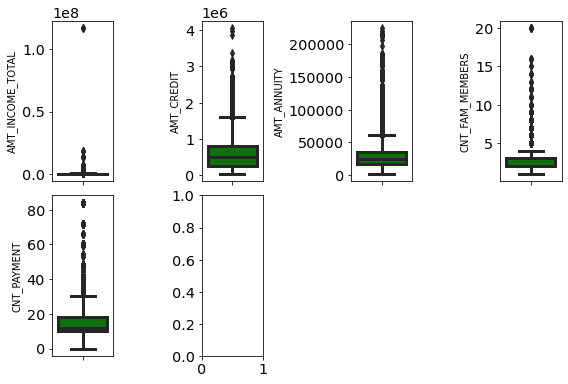

In [ ]:
features = nums
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

KeyError: ignored

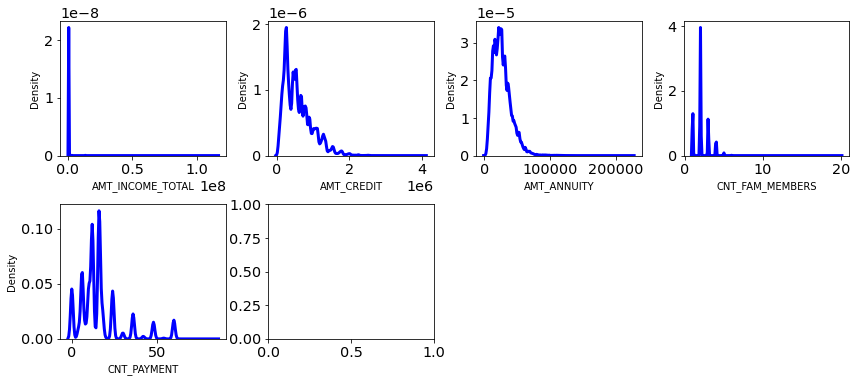

In [ ]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

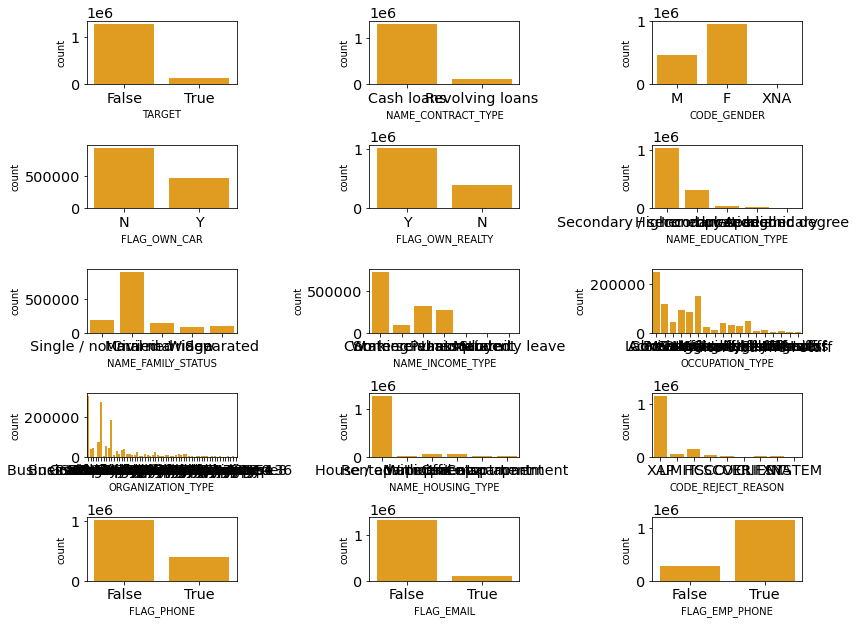

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(0, len(cats)):
    plt.subplot(6, 3, i+1)
    sns.countplot(x = df[cats[i]], color='orange', orient='v')
    plt.tight_layout()

### Bivariate Analysis

In [ ]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,1.000000,-0.001246,-0.003099,-0.000039,-0.001194,-0.001820,-0.000648,0.000193,-0.002231,0.000872,...,-0.017274,-0.000410,0.001370,-0.000318,-0.001871,-0.001004,0.000399,-0.000288,-0.000161,0.001295
TARGET,-0.001246,1.000000,0.020313,-0.002152,-0.023622,-0.007411,-0.032568,-0.035028,0.074866,-0.047804,...,0.028640,0.039901,-0.002539,0.030480,-0.031154,-0.006651,0.018021,0.017522,0.016981,0.000653
CNT_CHILDREN,-0.003099,0.020313,1.000000,0.011661,0.002784,0.029303,-0.001029,-0.022203,0.363034,-0.247960,...,0.000519,-0.012805,0.000773,-0.055155,-0.001950,0.005048,0.000711,-0.011007,-0.009546,-0.055692
AMT_INCOME_TOTAL,-0.000039,-0.002152,0.011661,1.000000,0.166257,0.206290,0.167663,0.076722,0.025717,-0.067488,...,0.012392,0.003942,0.001644,0.021204,-0.008771,-0.000399,0.007279,0.001319,0.001460,0.001486
AMT_CREDIT,-0.001194,-0.023622,0.002784,0.166257,1.000000,0.758441,0.986310,0.085543,-0.047639,-0.061188,...,-0.085981,-0.060109,0.003461,0.037726,-0.007420,0.001718,0.010510,-0.061130,-0.053370,-0.016088
AMT_ANNUITY,-0.001820,-0.007411,0.029303,0.206290,0.758441,1.000000,0.762251,0.102900,0.029009,-0.109437,...,-0.057651,-0.034802,0.004491,-0.005500,0.000955,0.001013,0.002260,-0.064179,-0.059703,-0.009928
AMT_GOODS_PRICE,-0.000648,-0.032568,-0.001029,0.167663,0.986310,0.762251,1.000000,0.088125,-0.045894,-0.058742,...,-0.088394,-0.061465,0.004427,0.036073,-0.001398,0.000103,0.004333,-0.065423,-0.058326,-0.020690
REGION_POPULATION_RELATIVE,0.000193,-0.035028,-0.022203,0.076722,0.085543,0.102900,0.088125,1.000000,-0.040122,0.000820,...,-0.020145,-0.025677,0.001100,0.000438,-0.005952,0.001525,0.006896,-0.005531,-0.004412,0.022842
DAYS_BIRTH,-0.002231,0.074866,0.363034,0.025717,-0.047639,0.029009,-0.045894,-0.040122,1.000000,-0.625300,...,-0.005769,0.025435,0.005051,-0.124743,-0.030806,0.016427,0.030621,-0.018123,-0.017542,-0.152286
DAYS_EMPLOYED,0.000872,-0.047804,-0.247960,-0.067488,-0.061188,-0.109437,-0.058742,0.000820,-0.625300,1.000000,...,-0.004151,0.015290,-0.002310,0.072965,0.038459,-0.017679,-0.041510,0.018478,0.014192,0.090383


<AxesSubplot:>

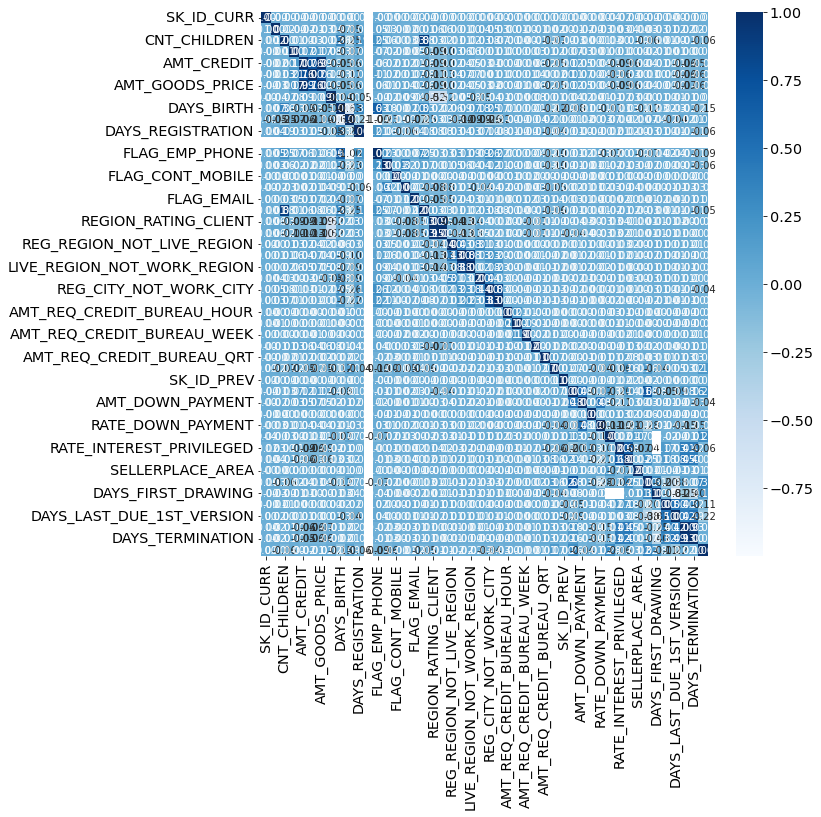

In [ ]:
# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(df[nums], diag_kind='kde')

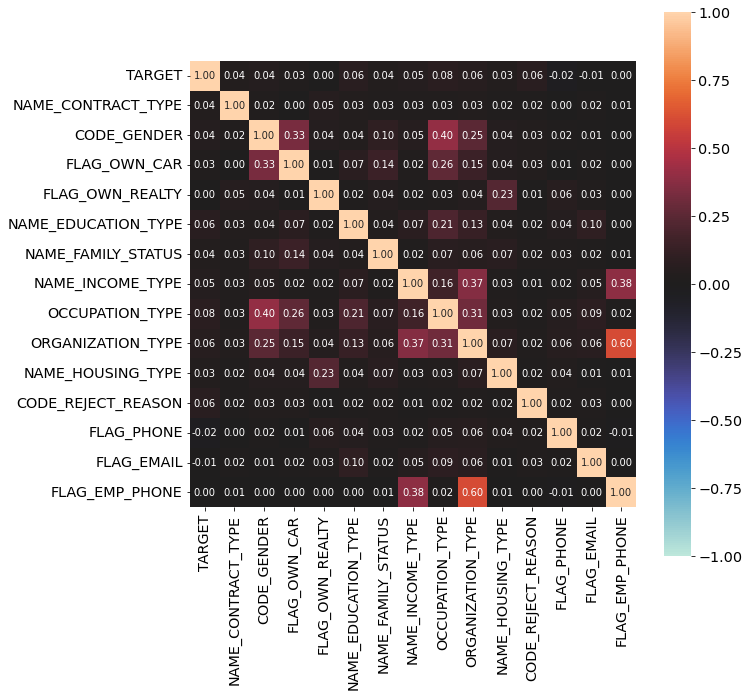

<Figure size 864x288 with 0 Axes>

In [ ]:
from dython.nominal import associations, identify_nominal_columns
associations(df[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_HOUSING_TYPE','CODE_REJECT_REASON','FLAG_PHONE','FLAG_EMAIL','FLAG_EMP_PHONE']], figsize=(10,10), nan_strategy='drop_samples')
plt.savefig('correlation.jpeg')

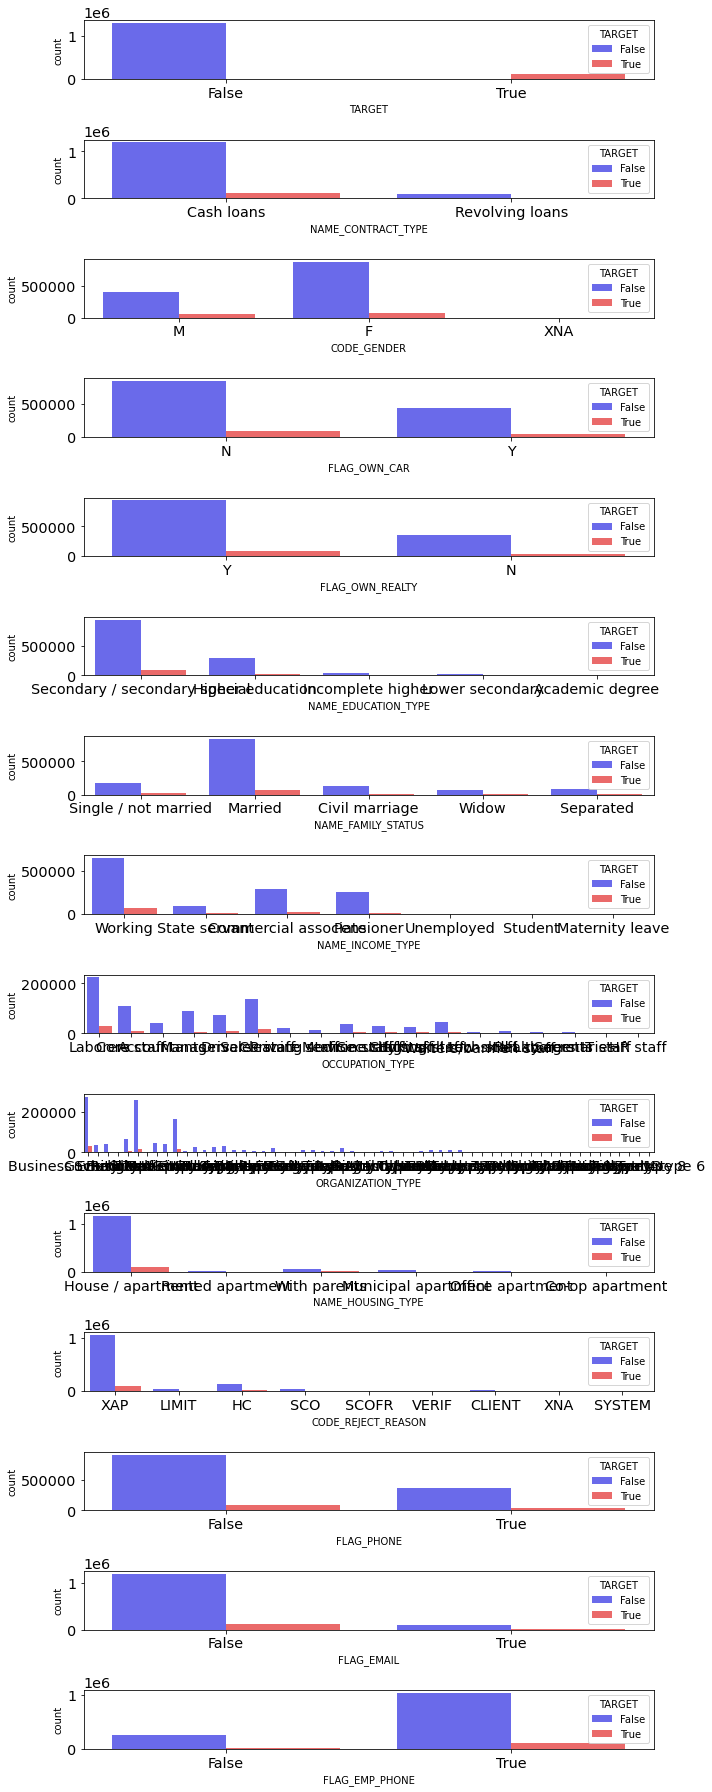

In [ ]:
features = cats
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(15, 1, i+1) 
    sns.countplot(x=features[i], data=df,  palette="seismic", hue="TARGET")
    #plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
features = nums
plt.figure(figsize=(10, 25))
for i in range(0, len(features)):
    plt.subplot(10, 1, i+1) 
    sns.countplot(x=features[i], data=df,  palette="seismic", hue="TARGET")
    #plt.xlabel(features[i])
    plt.tight_layout()

KeyboardInterrupt: ignored

## Data Preprocessing

### Data Cleansing

In [ ]:
nums = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_FAM_MEMBERS','CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN']
cats = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_HOUSING_TYPE','CODE_REJECT_REASON','FLAG_PHONE','FLAG_EMAIL','FLAG_EMP_PHONE']

In [ ]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 73, dtype: int64

In [ ]:
df=df.drop(columns=['DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'])

In [ ]:
df.isna().sum()

SK_ID_CURR                   0
TARGET                       0
NAME_CONTRACT_TYPE           0
CODE_GENDER                  0
FLAG_OWN_CAR                 0
                         ...  
NAME_SELLER_INDUSTRY         0
CNT_PAYMENT             307213
NAME_YIELD_GROUP             0
PRODUCT_COMBINATION        313
DAYS_FIRST_DRAWING      561106
Length: 68, dtype: int64

In [ ]:
df=df.drop(columns=['PRODUCT_COMBINATION','DAYS_FIRST_DRAWING'])

In [ ]:
df['CNT_PAYMENT']=df['CNT_PAYMENT'].fillna(df['CNT_PAYMENT'].mean())

In [ ]:
df.isna().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
CHANNEL_TYPE            0
SELLERPLACE_AREA        0
NAME_SELLER_INDUSTRY    0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
Length: 66, dtype: int64

In [ ]:
df=df.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','SK_ID_PREV','NAME_TYPE_SUITE','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT'])

In [ ]:
df['AMT_ANNUITY']=df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Laborers')

In [ ]:
df=df.drop(columns=['SK_ID_CURR'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1413701 non-null  bool   
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   CODE_GENDER                  1413701 non-null  object 
 3   FLAG_OWN_CAR                 1413701 non-null  object 
 4   FLAG_OWN_REALTY              1413701 non-null  object 
 5   CNT_CHILDREN                 1413701 non-null  int64  
 6   AMT_INCOME_TOTAL             1413701 non-null  float64
 7   AMT_CREDIT                   1413701 non-null  float64
 8   AMT_ANNUITY                  1413701 non-null  float64
 9   AMT_GOODS_PRICE              1413701 non-null  float64
 10  NAME_INCOME_TYPE             1413701 non-null  object 
 11  NAME_EDUCATION_TYPE          1413701 non-null  object 
 12  NAME_FAMILY_STATUS           1413701 non-n

In [ ]:
df.duplicated().sum()

68413

In [ ]:
df3=df.drop_duplicates()

In [ ]:
df3.duplicated().sum()

0

In [ ]:
nums = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','CNT_FAM_MEMBERS','CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN']

In [ ]:
df3['log_AMT_INCOME_TOTAL']= np.log(df3['AMT_INCOME_TOTAL']+np.finfo(float).eps)
df3['log_AMT_CREDIT']= np.log(df3['AMT_CREDIT']+np.finfo(float).eps)
df3['log_AMT_ANNUITY']= np.log(df3['AMT_ANNUITY']+np.finfo(float).eps)
df3['log_CNT_FAM_MEMBERS']= np.log(df3['CNT_FAM_MEMBERS']+np.finfo(float).eps)
df3['log_CNT_PAYMENT']= np.log(df3['CNT_PAYMENT']+np.finfo(float).eps)
df3['log_AMT_GOODS_PRICE']= np.log(df3['AMT_GOODS_PRICE']+np.finfo(float).eps)
df3['log_DAYS_EMPLOYED']= np.log(df3['DAYS_EMPLOYED']+np.finfo(float).eps)
df3['log_CNT_CHILDREN']= np.log(df3['CNT_CHILDREN']+np.finfo(float).eps)

In [ ]:
log=['log_AMT_INCOME_TOTAL','log_AMT_CREDIT','log_AMT_ANNUITY','log_CNT_FAM_MEMBERS','log_CNT_PAYMENT','log_AMT_GOODS_PRICE','log_DAYS_EMPLOYED','log_CNT_CHILDREN']

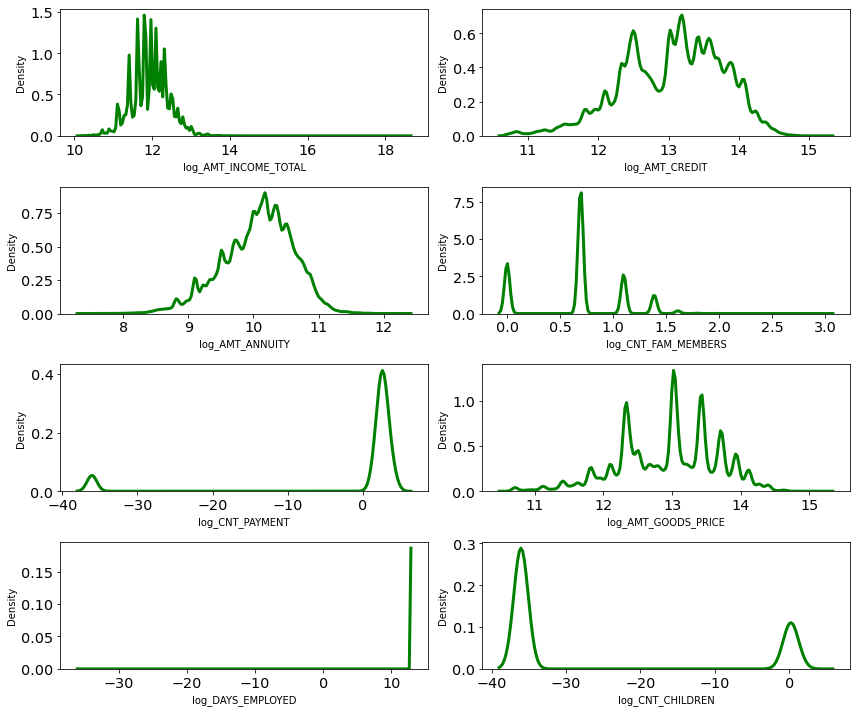

In [ ]:
features = log
plt.figure(figsize=(12, 10))
for i in range(0, len(log)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df3[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
df4 = df3.drop(columns=['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','CNT_FAM_MEMBERS','log_CNT_PAYMENT','AMT_GOODS_PRICE','log_DAYS_EMPLOYED','CNT_CHILDREN'])

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345288 entries, 0 to 1413700
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1345288 non-null  bool   
 1   NAME_CONTRACT_TYPE           1345288 non-null  object 
 2   CODE_GENDER                  1345288 non-null  object 
 3   FLAG_OWN_CAR                 1345288 non-null  object 
 4   FLAG_OWN_REALTY              1345288 non-null  object 
 5   NAME_INCOME_TYPE             1345288 non-null  object 
 6   NAME_EDUCATION_TYPE          1345288 non-null  object 
 7   NAME_FAMILY_STATUS           1345288 non-null  object 
 8   NAME_HOUSING_TYPE            1345288 non-null  object 
 9   REGION_POPULATION_RELATIVE   1345288 non-null  float64
 10  DAYS_BIRTH                   1345288 non-null  int64  
 11  DAYS_EMPLOYED                1345288 non-null  int64  
 12  DAYS_REGISTRATION            1345288 non-n

In [ ]:
nums1=['log_AMT_INCOME_TOTAL','log_AMT_CREDIT','log_AMT_ANNUITY','log_CNT_FAM_MEMBERS','CNT_PAYMENT','log_AMT_GOODS_PRICE','DAYS_EMPLOYED','log_CNT_CHILDREN']

from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df4)}')

filtered_entries = np.array([True] * len(df4))

for col in nums1:
    zscore = abs(stats.zscore(df3[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df7 = df4[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df7)}')

Jumlah baris sebelum memfilter outlier: 1345288
Jumlah baris setelah memfilter outlier: 1283912


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  bool   
 1   NAME_CONTRACT_TYPE           1283912 non-null  object 
 2   CODE_GENDER                  1283912 non-null  object 
 3   FLAG_OWN_CAR                 1283912 non-null  object 
 4   FLAG_OWN_REALTY              1283912 non-null  object 
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
df7 = df7.drop(columns=['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                        'LIVE_CITY_NOT_WORK_CITY','NAME_CASH_LOAN_PURPOSE','NAME_CASH_LOAN_PURPOSE','NAME_PORTFOLIO','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY',
                        'NAME_YIELD_GROUP','CHANNEL_TYPE','NAME_CLIENT_TYPE','NAME_PRODUCT_TYPE','CHANNEL_TYPE'])

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  bool   
 1   NAME_CONTRACT_TYPE           1283912 non-null  object 
 2   CODE_GENDER                  1283912 non-null  object 
 3   FLAG_OWN_CAR                 1283912 non-null  object 
 4   FLAG_OWN_REALTY              1283912 non-null  object 
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

### Feature Encoding

In [ ]:
df7['TARGET'].unique()

array([ True, False])

In [ ]:
df7['TARGET']=df7['TARGET'].astype(int)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  object 
 2   CODE_GENDER                  1283912 non-null  object 
 3   FLAG_OWN_CAR                 1283912 non-null  object 
 4   FLAG_OWN_REALTY              1283912 non-null  object 
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
mapping_contract={'Cash loans':0, 'Revolving loans':1}
df7['NAME_CONTRACT_TYPE']=df7['NAME_CONTRACT_TYPE'].map(mapping_contract)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  object 
 3   FLAG_OWN_CAR                 1283912 non-null  object 
 4   FLAG_OWN_REALTY              1283912 non-null  object 
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
df7['CODE_GENDER'].replace('XNA', 'F', inplace=True)

In [ ]:
mapping_GENDER={'F':0, 'M':1}
df7['CODE_GENDER']=df7['CODE_GENDER'].map(mapping_GENDER)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  object 
 4   FLAG_OWN_REALTY              1283912 non-null  object 
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
mapping_CAR={'N':0, 'Y':1}
df7['FLAG_OWN_CAR']=df7['FLAG_OWN_CAR'].map(mapping_CAR)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  object 
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
mapping_REALTY={'N':0, 'Y':1}
df7['FLAG_OWN_REALTY']=df7['FLAG_OWN_REALTY'].map(mapping_REALTY)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  int64  
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  object 
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
mapping_EDUCATION={'Incomplete higher':0, 'Lower secondary':1, 'Secondary / secondary special':2, 'Academic degree':3, 'Higher education':4}
df7['NAME_EDUCATION_TYPE']=df7['NAME_EDUCATION_TYPE'].map(mapping_EDUCATION)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  int64  
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  int64  
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
df7['FLAG_PHONE']=df7['FLAG_PHONE'].astype(int)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  int64  
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  int64  
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
df7['FLAG_EMAIL']=df7['FLAG_EMAIL'].astype(int)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  int64  
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  int64  
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
df7['FLAG_EMP_PHONE']=df7['FLAG_EMP_PHONE'].astype(int)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  int64  
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  int64  
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
mapping_lastap={'N':0, 'Y':1}
df7['FLAG_LAST_APPL_PER_CONTRACT']=df7['FLAG_LAST_APPL_PER_CONTRACT'].map(mapping_lastap)

In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   TARGET                       1283912 non-null  int64  
 1   NAME_CONTRACT_TYPE           1283912 non-null  int64  
 2   CODE_GENDER                  1283912 non-null  int64  
 3   FLAG_OWN_CAR                 1283912 non-null  int64  
 4   FLAG_OWN_REALTY              1283912 non-null  int64  
 5   NAME_INCOME_TYPE             1283912 non-null  object 
 6   NAME_EDUCATION_TYPE          1283912 non-null  int64  
 7   NAME_FAMILY_STATUS           1283912 non-null  object 
 8   NAME_HOUSING_TYPE            1283912 non-null  object 
 9   REGION_POPULATION_RELATIVE   1283912 non-null  float64
 10  DAYS_BIRTH                   1283912 non-null  int64  
 11  DAYS_EMPLOYED                1283912 non-null  int64  
 12  DAYS_REGISTRATION            1283912 non-n

In [ ]:
cats_one = ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','ORGANIZATION_TYPE','CODE_REJECT_REASON','NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_GOODS_CATEGORY']
for cats_one in  ['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','ORGANIZATION_TYPE','CODE_REJECT_REASON','NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_GOODS_CATEGORY']:
    onehots = pd.get_dummies(df7[cats_one], prefix=cats_one)
    df7 = df7.join(onehots)

In [ ]:
df8=df7.drop(columns=['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','ORGANIZATION_TYPE','CODE_REJECT_REASON','NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_GOODS_CATEGORY'])

In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283912 entries, 0 to 1413700
Columns: 165 entries, TARGET to NAME_GOODS_CATEGORY_XNA
dtypes: float64(10), int64(17), uint8(138)
memory usage: 475.5 MB


### Feature Selection

In [ ]:
corrmat = df8.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df8[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
a = corrmat['TARGET'] #mengambil nilai korelasi Revenue
hasil = a[(a>0.04)|(a<-0.04)]
hasil

TARGET                           1.000000
CODE_GENDER                      0.053759
NAME_EDUCATION_TYPE             -0.045702
DAYS_BIRTH                       0.076402
DAYS_EMPLOYED                   -0.048181
DAYS_REGISTRATION                0.044397
FLAG_EMP_PHONE                   0.049149
NAME_INCOME_TYPE_Pensioner      -0.049409
NAME_INCOME_TYPE_Working         0.058028
ORGANIZATION_TYPE_XNA           -0.049144
CODE_REJECT_REASON_XAP          -0.052483
NAME_CONTRACT_STATUS_Approved   -0.048737
NAME_CONTRACT_STATUS_Refused     0.055146
Name: TARGET, dtype: float64

In [ ]:
df8_selection=df8[['TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','FLAG_EMP_PHONE','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_Working','ORGANIZATION_TYPE_XNA','CODE_REJECT_REASON_XAP','NAME_CONTRACT_STATUS_Approved','NAME_CONTRACT_STATUS_Refused']]

## Modelling and Evaluation


### Split Data

In [ ]:
# Split Feature and Label
X = df8_selection[['CODE_GENDER','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','FLAG_EMP_PHONE','NAME_INCOME_TYPE_Pensioner','NAME_INCOME_TYPE_Working','ORGANIZATION_TYPE_XNA','CODE_REJECT_REASON_XAP','NAME_CONTRACT_STATUS_Approved','NAME_CONTRACT_STATUS_Refused']]
y = df8_selection['TARGET'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
df8_selection['TARGET'].value_counts()

0    1173893
1     110019
Name: TARGET, dtype: int64

### Class Imbalance

In [ ]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    1173893
1     110019
Name: TARGET, dtype: int64


UNDERSAMPLING
0    77040
1    77040
Name: TARGET, dtype: int64


OVERSAMPLING
0    821698
1    821698
Name: TARGET, dtype: int64


SMOTE
0    821698
1    821698
Name: TARGET, dtype: int64


### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(X_test)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print('AUC:'+ str(roc_auc_score(y_test, y_pred)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

#### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(lr)

Accuracy (Test Set): 0.52
Precision (Test Set): 0.09
Recall (Test Set): 0.54
F1-Score (Test Set): 0.16
AUC:0.5270417396419388


In [ ]:
print('Train score: ' + str(lr.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(lr.score(X_test, y_test))) #accuracy

Train score: 0.5305124267066489
Test score: 0.5162939346892573


##### Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
solver = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
hyperparameters = dict(penalty= bpenalty, C=C, solver=solver )

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
lr_tuned = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
lr_tuned.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(lr_tuned) 

Accuracy (Test Set): 0.52
Precision (Test Set): 0.09
Recall (Test Set): 0.54
F1-Score (Test Set): 0.16
AUC:0.5270417396419388


In [ ]:
print('Train score: ' + str(lr.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(lr.score(X_test, y_test))) #accuracy

Train score: 0.5305124267066489
Test score: 0.5162939346892573


In [ ]:
logres = LogisticRegression(penalty='l2', C=0.0001, solver='lbfgs', random_state=42)
logres.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = logres.predict(X_test)

0.5305124267066489


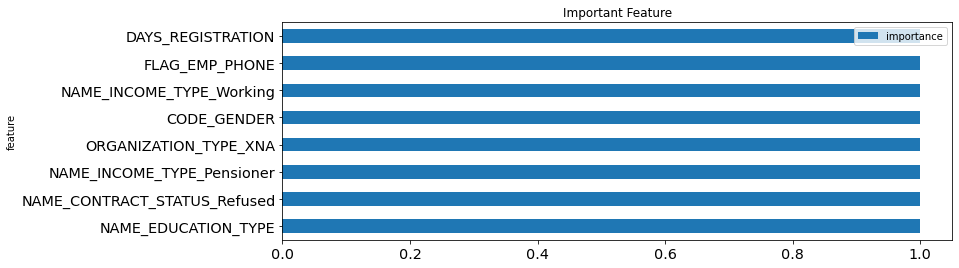

In [ ]:
import math

feature_names = X_over_SMOTE.columns.to_list()

#Get the scores
score = logres.score(X_over_SMOTE.values, y_over_SMOTE)
print(score)
w0 = logres.intercept_[0]
w = logres.coef_[0]

feature_importance = pd.DataFrame(feature_names, columns = ['feature'])
feature_importance['importance'] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by=['importance'],ascending=False)
feature_importance = feature_importance[:8].sort_values(by=['importance'], ascending=False)

#Visualization
ax = feature_importance.sort_values(by=['importance'], ascending=True).plot.barh(x='feature', y='importance')

plt.title('Important Feature')
plt.show()

In [ ]:
print('Train score: ' + str(lr_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(lr_tuned.score(X_test, y_test))) #accuracy

Train score: 0.5470014530886044
Test score:0.5400103095909519


#### 2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(rf)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.80
Recall (Test Set): 0.79
F1-Score (Test Set): 0.80
AUC:0.8874302665971139


In [ ]:
 print('Train score: ' + str(rf.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(rf.score(X_test, y_test))) #accuracy

Train score: 0.9999732261731196
Test score:0.9655480380295659


##### Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )
 
# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(rf_tuned)

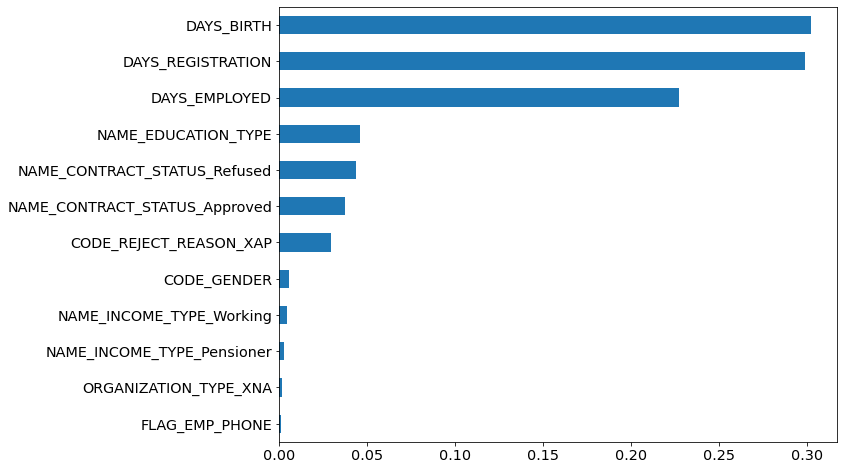

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

### 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(dt)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.67
Recall (Test Set): 0.82
F1-Score (Test Set): 0.74
AUC:0.8888721650390374


In [ ]:
print('Train score: ' + str(dt.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(dt.score(X_test, y_test))) #accuracy

Train score: 0.9999787026377087
Test score:0.9497395982075634


##### Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
dt_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(dt_tuned)

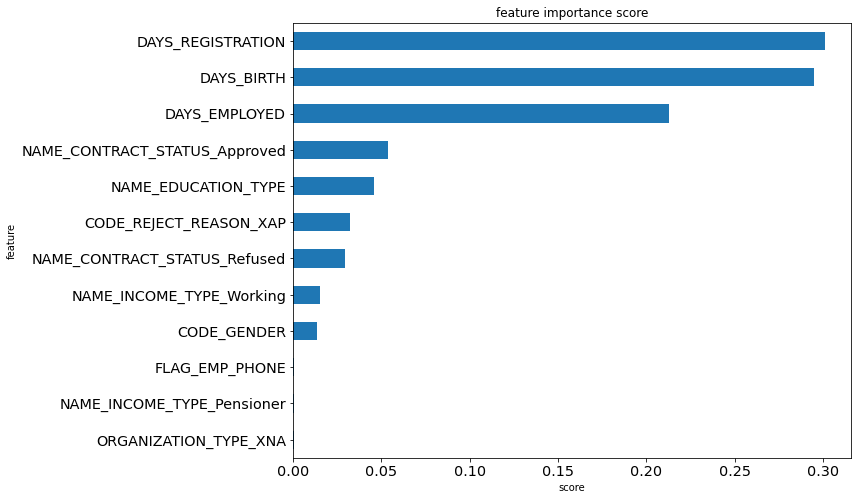

In [ ]:
feat_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

plt.savefig('futureimportanceab.jpeg', dpi=200)

#### 4. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(ab)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.12
Recall (Test Set): 0.40
F1-Score (Test Set): 0.19
AUC:0.5666034645107373


In [ ]:
print('Train score: ' + str(ab.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(ab.score(X_test, y_test))) #accuracy

Train score: 0.6638028813505692
Test score:0.7055720271877126


##### Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(ab_tuned)

In [ ]:
print('Train score: ' + str(ab_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score: ' + str(ab_tuned.score(X_test, y_test))) #accuracy

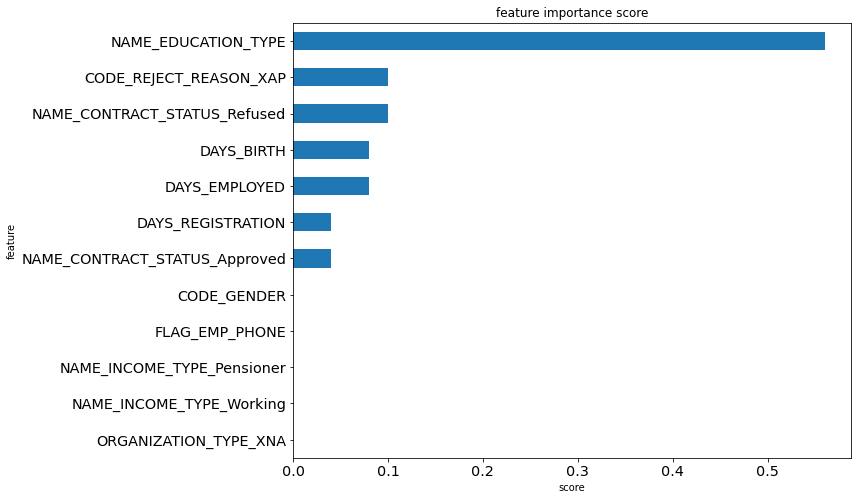

In [ ]:
feat_importances = pd.Series(ab.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

plt.savefig('futureimportanceab.jpeg', dpi=200)

#### 5. XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_over_SMOTE, y_over_SMOTE)

eval_classification(xg)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.13
Recall (Test Set): 0.42
F1-Score (Test Set): 0.19
AUC:0.5742286762921522


In [ ]:
print('Train score: ' + str(xg.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(xg.score(X_test, y_test))) #accuracy

Train score: 0.6704141911018403
Test score:0.6988348123185885


In [ ]:
show_feature_importance(xg)

##### Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
eval_classification(xg_tuned)

In [ ]:
print('Train score: ' + str(xg_tuned.score(X_over_SMOTE, y_over_SMOTE))) #accuracy
print('Test score:' + str(xg_tuned.score(X_test, y_test))) #accuracy

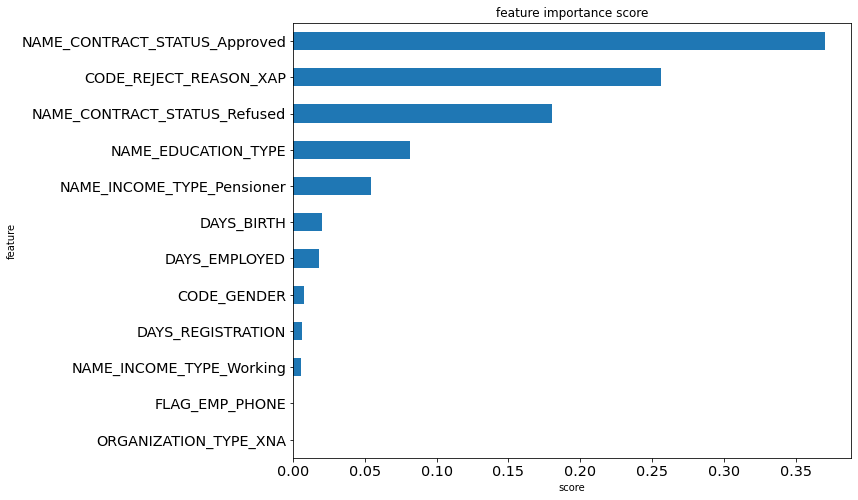

In [ ]:
feat_importances = pd.Series(xg.feature_importances_, index=X_train.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

plt.savefig('futureimportanceab.jpeg', dpi=200)

### Best Model

In [ ]:
# Split Feature and Label
X_imp = X_over_SMOTE[['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_EMPLOYED','NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS_Refused','NAME_CONTRACT_STATUS_Approved','CODE_REJECT_REASON_XAP','CODE_GENDER','NAME_INCOME_TYPE_Working']]
y_imp = y_over_SMOTE # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_class(model):
    y_pred_imp = model.predict(X_test_imp)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test_imp, y_pred_imp))
    print("Precision (Test Set): %.2f" % precision_score(y_test_imp, y_pred_imp))
    print("Recall (Test Set): %.2f" % recall_score(y_test_imp, y_pred_imp))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test_imp, y_pred_imp))
    print('AUC:'+ str(roc_auc_score(y_test_imp, y_pred_imp)))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_imp = RandomForestClassifier(random_state=42)
rf_imp.fit(X_train_imp,y_train_imp)

eval_class(rf_imp)

Accuracy (Test Set): 0.97
Precision (Test Set): 0.97
Recall (Test Set): 0.97
F1-Score (Test Set): 0.97
AUC:0.970776717477611


[[239298   6660]
 [  7750 239311]]


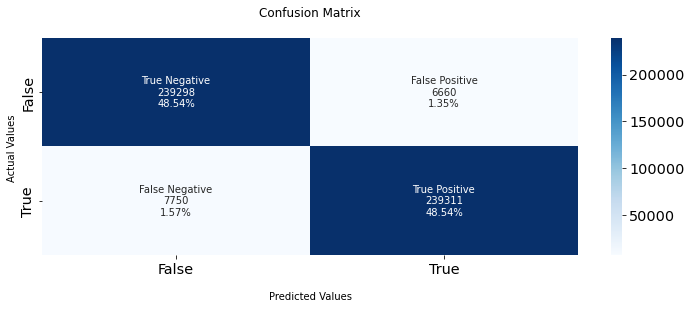

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred_c = rf_imp.predict(X_test_imp)
cf_matrix = confusion_matrix(y_test_imp, y_pred_c)

print(cf_matrix)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Split Feature and Label
X_imp1 = X_over_SMOTE[['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_EMPLOYED','NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS_Refused','NAME_CONTRACT_STATUS_Approved','CODE_REJECT_REASON_XAP','CODE_GENDER','NAME_INCOME_TYPE_Working']]
y_imp1 = y_over_SMOTE # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train_imp1, X_test_imp1, y_train_imp1, y_test_imp1 = train_test_split(X_imp1, y_imp1, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_imp1 = DecisionTreeClassifier(random_state=42)
dt_imp1.fit(X_train_imp1,y_train_imp1)

eval_class(dt_imp1)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
AUC:0.9529706329784866


[[232301  13657]
 [  9520 237541]]


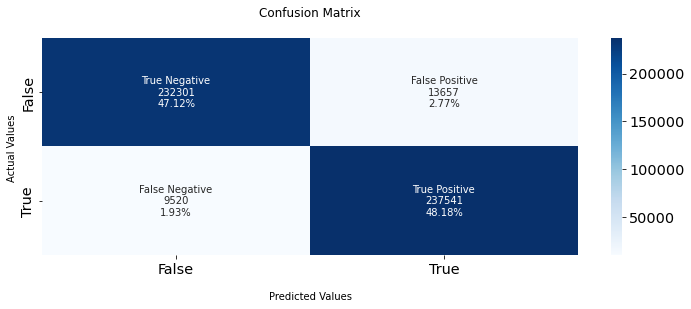

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
y_pred_c = dt_imp1.predict(X_test_imp1)
cf_matrix = confusion_matrix(y_test_imp1, y_pred_c)

print(cf_matrix)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()